In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PETS)

In [4]:
path.ls()

(#2) [Path('/home/tobias/.fastai/data/oxford-iiit-pet/annotations'),Path('/home/tobias/.fastai/data/oxford-iiit-pet/images')]

In [5]:
files = get_image_files(path/"images")
len(files)

7390

In [6]:
# cats have upper case starting letter
def label_func(f: str) -> bool:
    return f[0].isupper()

In [12]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

In [13]:
dls.vocab

[False, True]

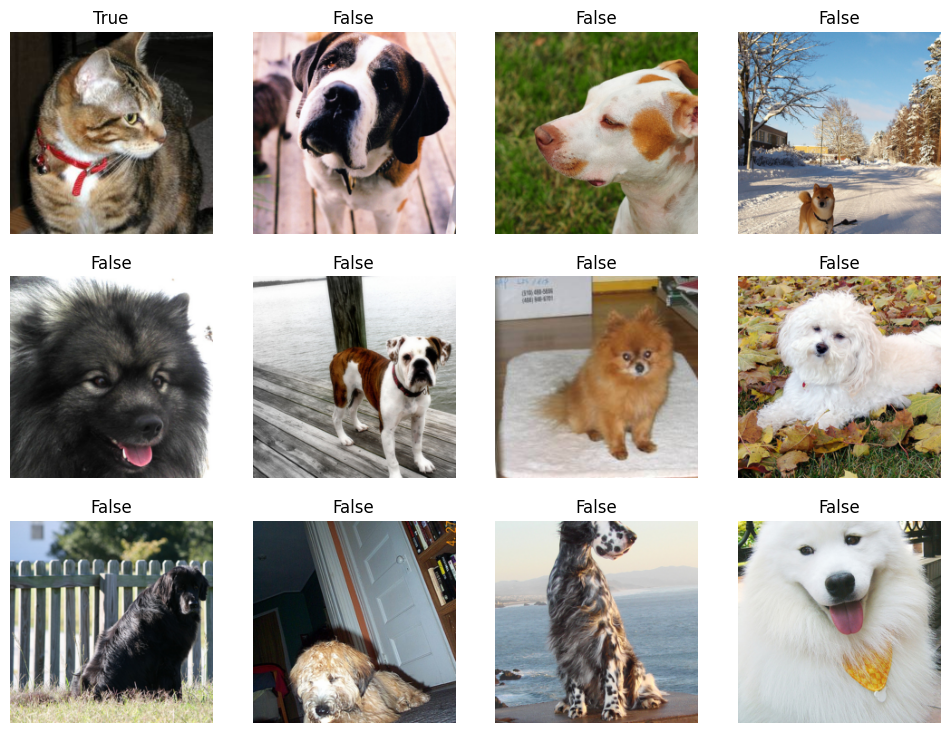

In [15]:
dls.show_batch(max_n = 12)

In [16]:
learn = vision_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(1)

/home/tobias/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/tobias/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/tobias/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

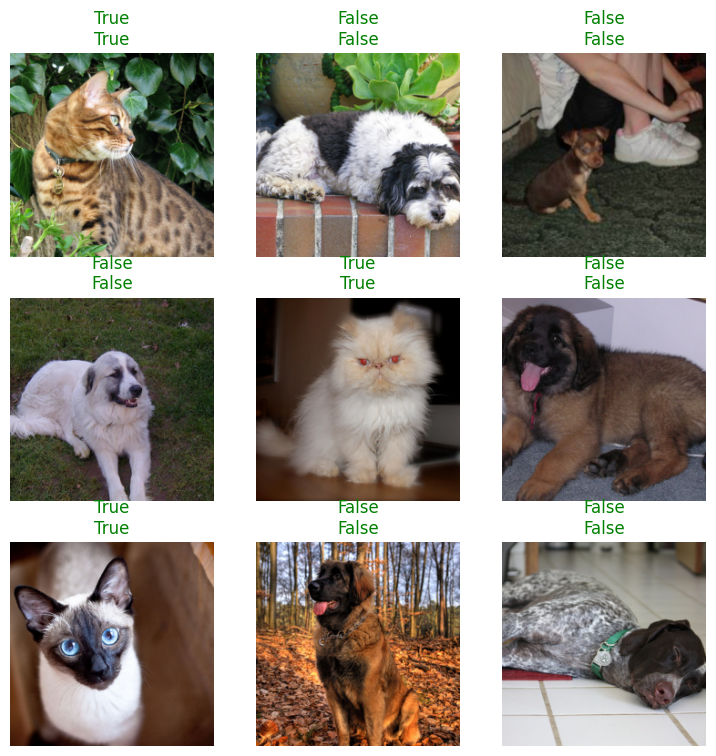

In [17]:
learn.show_results()

## Classifying according to breed

In [18]:
files[0].name

'Birman_115.jpg'

In [19]:
pattern = r'^(.*)_\d+.jpg'

In [20]:
dls = ImageDataLoaders.from_name_re(path, files, pattern, item_tfms=Resize(224))

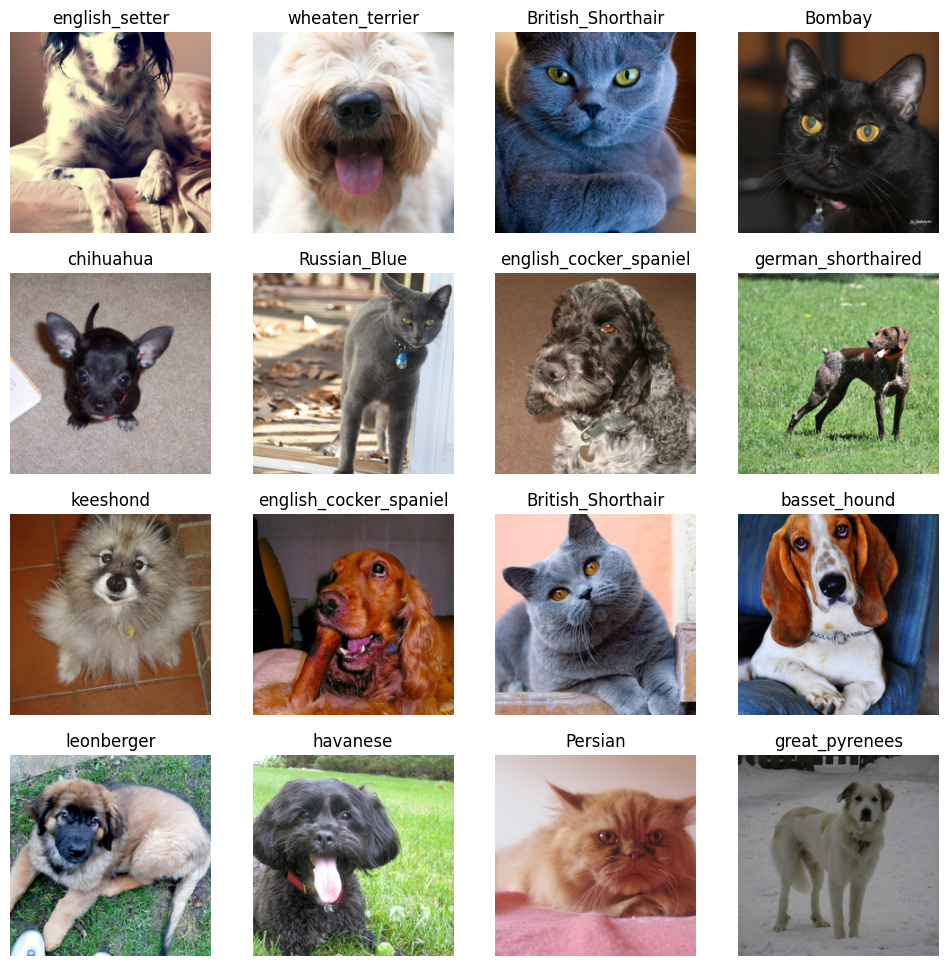

In [21]:
dls.show_batch(max_n=16)

In [23]:
# resize to larger image array to be more accurate
dls = ImageDataLoaders.from_name_re(path, files, pattern, item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224))

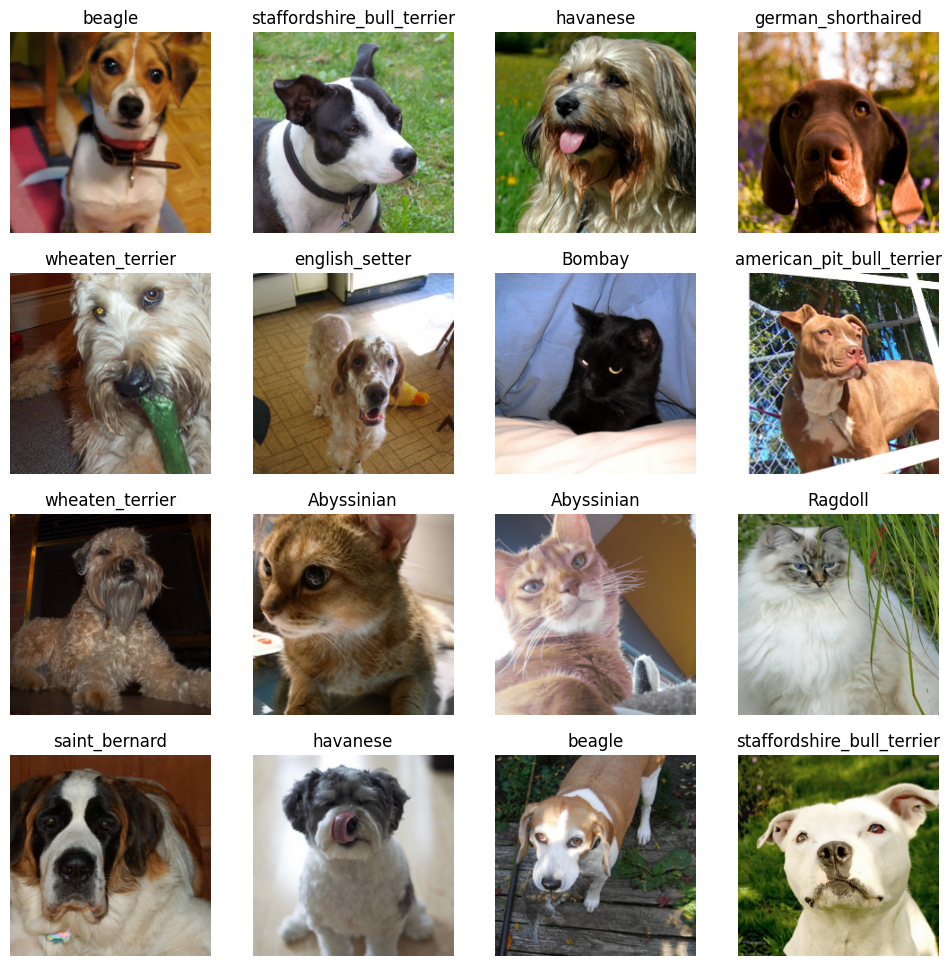

In [24]:
dls.show_batch(max_n=16)

In [25]:
learn = vision_learner(dls, resnet50, metrics=error_rate)

/home/tobias/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/tobias/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.0003311311302240938)

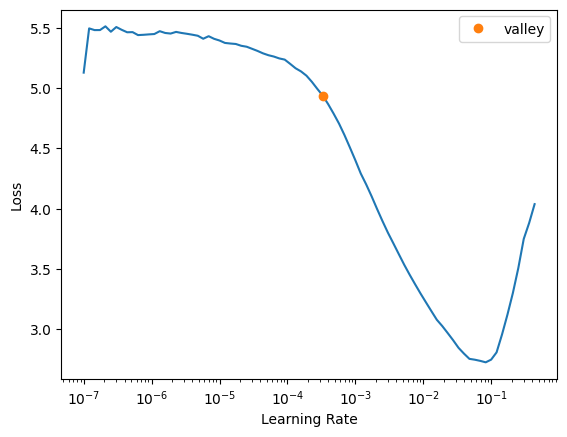

In [26]:
learn.lr_find()

In [27]:
learn.fine_tune(2, .0003311311302240938)

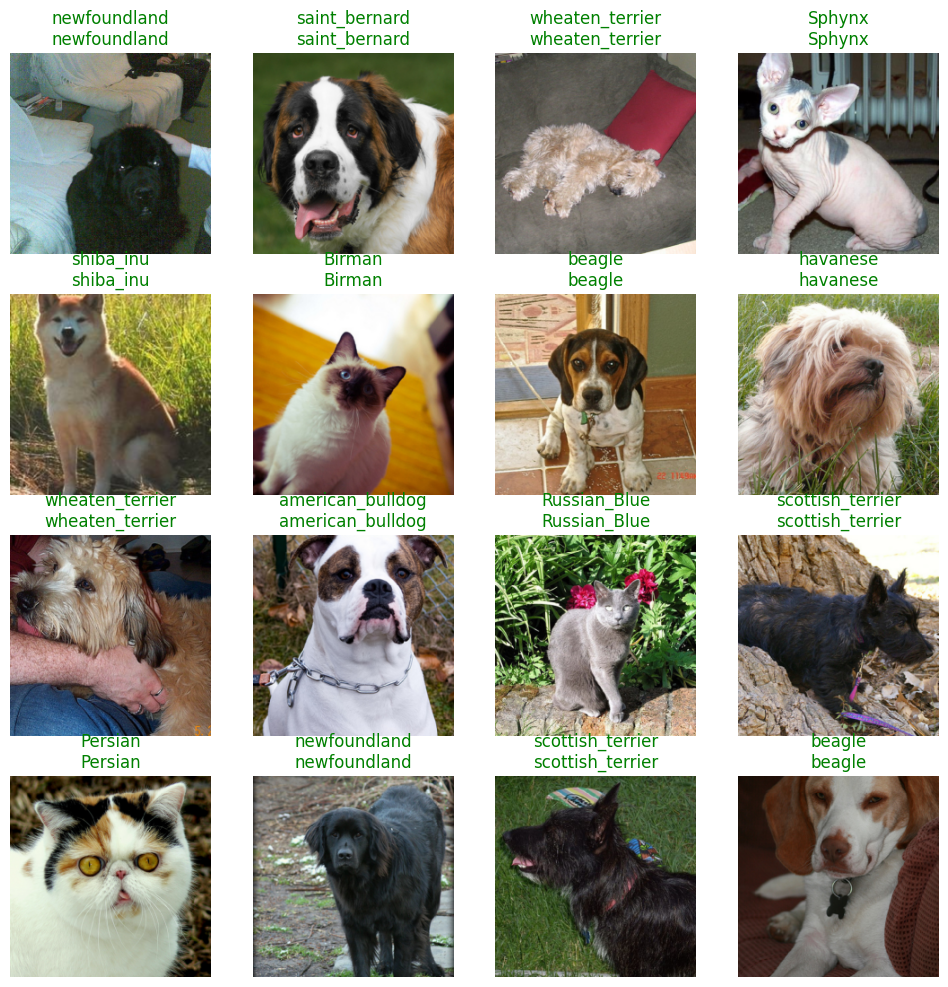

In [28]:
learn.show_results(max_n=16)

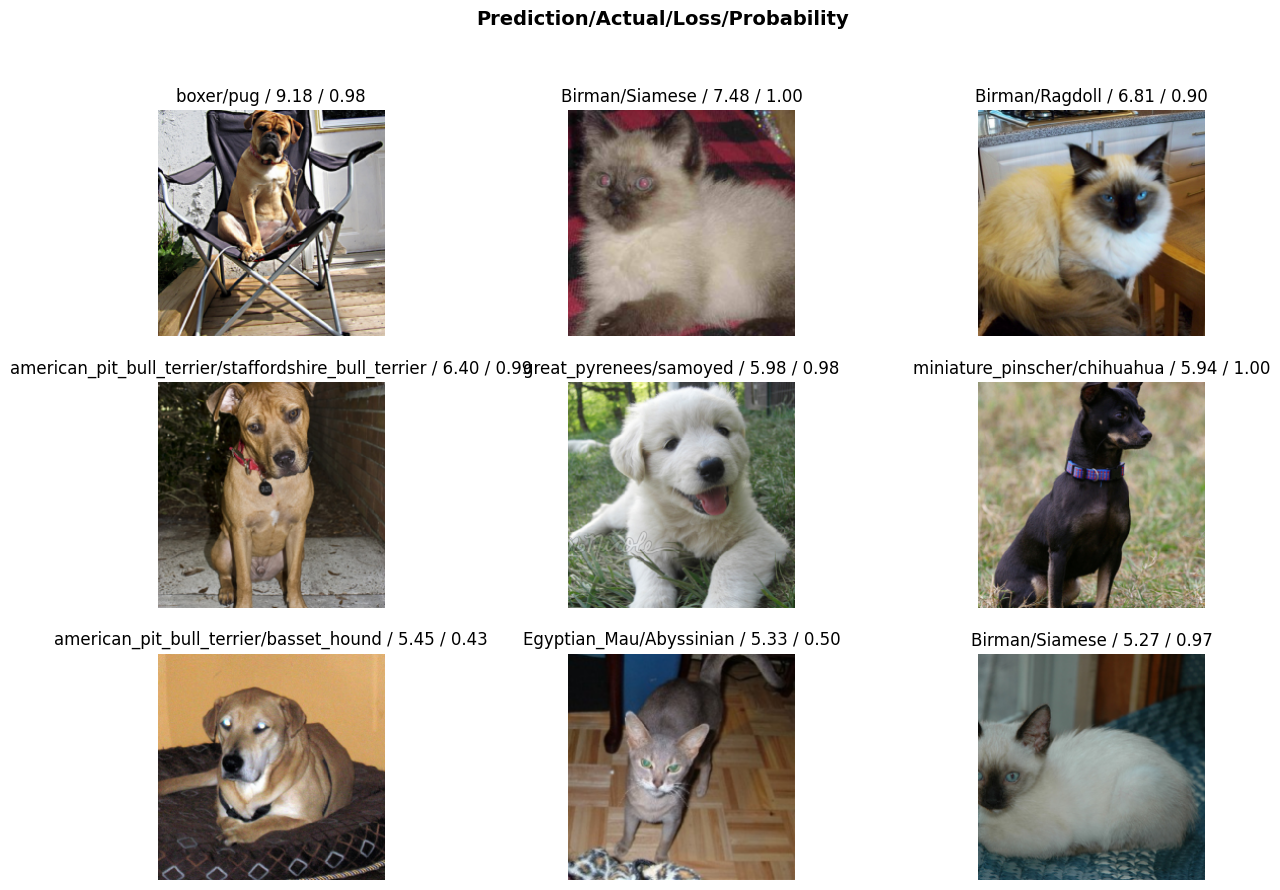

In [29]:
# see where the model did worst
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))